In [149]:
from sklearn import tree
import pandas as pd
import graphviz

def build_X_Y(df_t1, df_t2):
    X = []
    Y = []
    for i in range(len(df_t1)):
        x = df_t1.iloc[i]
        X.append([x['incomodo'], x['int1'], x['int2'], x['dif_inters']])
        Y.append(x['preferencia'])
    for i in range(len(df_t2)):
        x = df_t2.iloc[i]
        X.append([x['incomodo'], x['int1'], x['int2'], x['dif_inters']])
        Y.append(x['preferencia'])

    return X, Y

def accuracy(prediction, answers):
    matches = 0
    for i in range(len(prediction)):
        if prediction[i] == answers[i]:
            matches += 1
    return matches/len(prediction)

clf = tree.DecisionTreeClassifier()

feeds = pd.read_csv("feedbacks - Página1.csv", names=['sessao', 'preferencia', 'incomodo', 'int1', 'int2', 'data', 'justif', 'email'])

incomodos = feeds['incomodo']
interesses1 = feeds['int1']
interesses2 = feeds['int2']
dif_inters = abs(interesses2 - interesses1)
feeds['dif_inters'] = dif_inters # adiciona coluna de diferenças no dataframe

p_train = 0.7
p_test = 1 - p_train

primeiros = feeds.loc[feeds['preferencia'] == 'Primeiro']
primeiros_train = primeiros[:int(len(primeiros)*p_train)]
primeiros_test = primeiros[int(len(primeiros)*p_test):]

segundos = feeds.loc[feeds['preferencia'] == 'Segundo']
segundos_train = segundos[:int(len(segundos)*p_train)]
segundos_test = segundos[int(len(segundos)*p_test):]




X_train, Y_train = build_X_Y(primeiros_train, segundos_train)

X_test, Y_test = build_X_Y(primeiros_test, segundos_test)

clf.fit(X_train, Y_train)

prediction = clf.predict(X_test)

print(accuracy(prediction, Y_test))


# Constrói arvore de decisão para todo o dataset
# for i in range(len(feeds)):
#     X.append([incomodos[i], interesses1[i], interesses2[i], abs(dif_inters[i])])
#     Y.append(feeds['preferencia'][i])

# clf.fit(X, Y)

#dot_data = tree.export_graphviz(clf, feature_names=['incomodo', 'int1', 'int2', 'diff_ints'], class_names=['Primeiro', 'Segundo'], max_depth=7,out_file=None) 
# graph = graphviz.Source(dot_data)
# graph.render("feeds_tree_diff")
# graph'''



0.8571428571428571


0.625


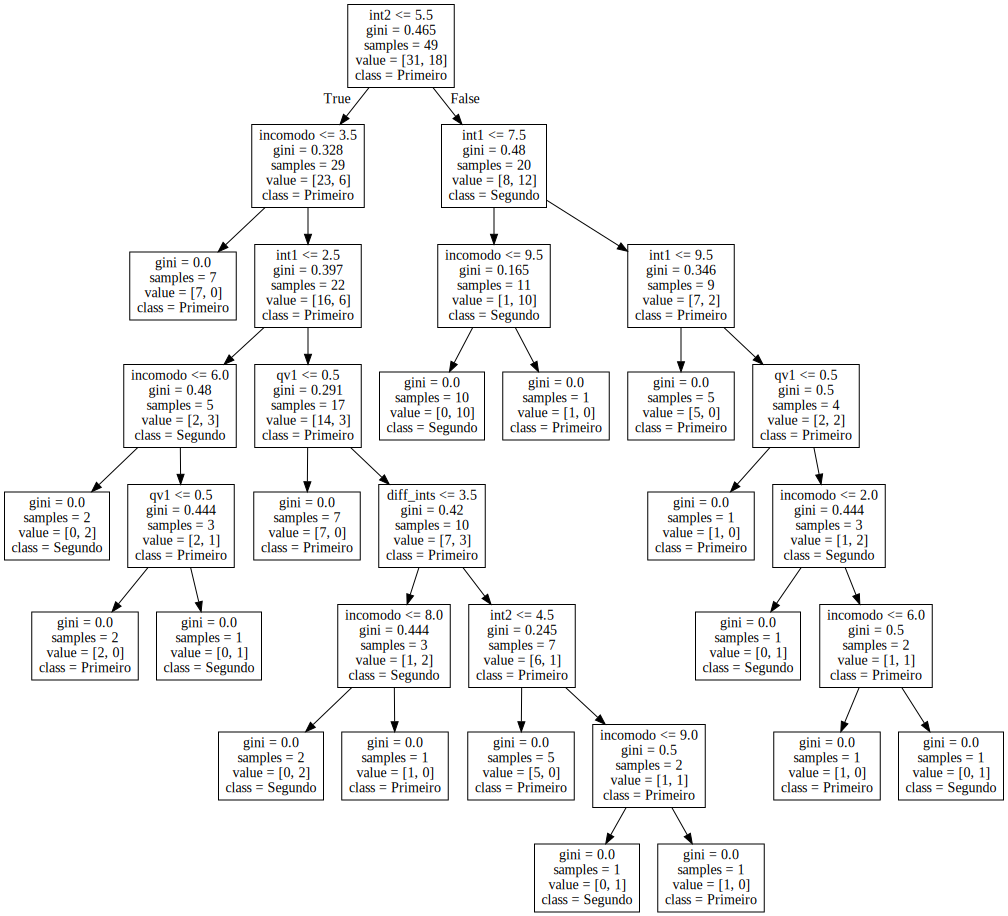

In [162]:
from sklearn import tree
import pandas as pd
import graphviz

def build_X_Y(df_t1, df_t2):
    X = []
    Y = []
    for i in range(len(df_t1)):
        x = df_t1.iloc[i]
        X.append([x['incomodo'], x['int1'], x['int2'], x['dif_inters'], x['qv1'], x['qv2']])
        Y.append(x['preferencia'])
    for i in range(len(df_t2)):
        x = df_t2.iloc[i]
        X.append([x['incomodo'], x['int1'], x['int2'], x['dif_inters'], x['qv1'], x['qv2']])
        Y.append(x['preferencia'])

    return X, Y

def accuracy(prediction, answers):
    matches = 0
    for i in range(len(prediction)):
        if prediction[i] == answers[i]:
            matches += 1
    return matches/len(prediction)

clf = tree.DecisionTreeClassifier()

feeds = pd.read_csv("feedbacks_marcacoes_bin - Página1.csv", names=['sessao', 'preferencia', 'qv1', 'qv2', 'incomodo', 'int1', 'int2', 'data', 'justif', 'email'])

incomodos = feeds['incomodo']
interesses1 = feeds['int1']
interesses2 = feeds['int2']
dif_inters = abs(interesses2 - interesses1)
feeds['dif_inters'] = dif_inters # adiciona coluna de diferenças no dataframe
qv1 = feeds['qv1']
qv2 = feeds['qv2']

p_train = 0.7
p_test = 1 - p_train

primeiros = feeds.loc[feeds['preferencia'] == 'Primeiro']
primeiros_train = primeiros[:int(len(primeiros)*p_train)]
primeiros_test = primeiros[int(len(primeiros)*p_train):]

segundos = feeds.loc[feeds['preferencia'] == 'Segundo']
segundos_train = segundos[:int(len(segundos)*p_train)]
segundos_test = segundos[int(len(segundos)*p_train):]




X_train, Y_train = build_X_Y(primeiros_train, segundos_train)

X_test, Y_test = build_X_Y(primeiros_test, segundos_test)

clf.fit(X_train, Y_train)

prediction = clf.predict(X_test)

print(accuracy(prediction, Y_test))


#Constrói arvore de decisão para todo o dataset
X = []
Y = []
for i in range(len(feeds)):
    X.append([incomodos[i], interesses1[i], interesses2[i], abs(dif_inters[i]), qv1[i], qv2[i]])
    Y.append(feeds['preferencia'][i])

clf.fit(X, Y)

dot_data = tree.export_graphviz(clf, feature_names=['incomodo', 'int1', 'int2', 'diff_ints', 'qv1', 'qv2'], class_names=['Primeiro', 'Segundo'], max_depth=7,out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("feeds_tree_diff_qv1_qv2")
graph

